### Imports Needed For EDA

In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

### Making CSV files for Each Relevent Feature (Do not run anymore, we saved the files)


In [8]:
# base_dir = "stress_dataset/Data"
# exams = ["Final", "Midterm 1", "Midterm 2"]
# eda_rows, hr_rows, temp_rows, acc_rows,ibi_rows = [], [], [], [],[]

# for subj in os.listdir(base_dir):
#     subj_path = os.path.join(base_dir, subj)
#     if not subj.startswith("S") or not os.path.isdir(subj_path):
#         continue
#     for exam in exams:
#         exam_dir = os.path.join(base_dir, subj, exam)

#         with open(os.path.join(exam_dir, "EDA.csv")) as f:
#             start = float(f.readline().strip())
#             freq = float(f.readline().strip())
#         eda = pd.read_csv(os.path.join(exam_dir, "EDA.csv"), skiprows=2, header=None, names=["value"])
#         eda["timestamp"] = [start + i * (1 / freq) for i in range(len(eda))]
#         eda["Subject"] = subj
#         eda["Exam"] = exam
#         eda_rows.append(eda)
        
#         with open(os.path.join(exam_dir, "HR.csv")) as f:
#             start = float(f.readline().strip())
#             freq = float(f.readline().strip())
#         hr = pd.read_csv(os.path.join(exam_dir, "HR.csv"), skiprows=2, header=None, names=["value"])
#         hr["timestamp"] = [start + i * (1 / freq) for i in range(len(hr))]
#         hr["Subject"] = subj
#         hr["Exam"] = exam
#         hr_rows.append(hr)

#         with open(os.path.join(exam_dir, "TEMP.csv")) as f:
#             start = float(f.readline().strip())
#             freq = float(f.readline().strip())
#         temp = pd.read_csv(os.path.join(exam_dir, "TEMP.csv"), skiprows=2, header=None, names=["value"])
#         temp["timestamp"] = [start + i * (1 / freq) for i in range(len(temp))]
#         temp["Subject"] = subj
#         temp["Exam"] = exam
#         temp_rows.append(temp)

                
               
#         with open(os.path.join(exam_dir, "ACC.csv")) as f:
#             start_time = float(f.readline().split(",")[0].strip()) 
#             freq = float(f.readline().split(",")[0].strip())       

      
#         acc = pd.read_csv(
#             os.path.join(exam_dir, "ACC.csv"),
#             skiprows=2,
#             header=None,
#             names=["ACC_X", "ACC_Y", "ACC_Z"]
#         )

#         acc["timestamp"] = [start_time + i / freq for i in range(len(acc))]
#         acc["Subject"] = subj
#         acc["Exam"] = exam
#         acc_rows.append(acc)
        
        
#         ibi_path = os.path.join(exam_dir, "IBI.csv")
#         if os.path.exists(ibi_path):
#             with open(ibi_path) as f:
#                 first_line = f.readline()
#                 start_time = float(first_line.strip().split(",")[0])  # grab timestamp
#             ibi = pd.read_csv(
#                 ibi_path,
#                 skiprows=1,  # skip the header line
#                 header=None,
#                 names=["offset", "ibi_duration"]
#             )
#             ibi["timestamp"] = ibi["offset"] + start_time
#             ibi["Subject"] = subj
#             ibi["Exam"] = exam
#             ibi_rows.append(ibi)



# os.makedirs("cleaned_data", exist_ok=True)


# pd.concat(eda_rows).to_csv("cleaned_data/eda_data.csv", index=False)


# pd.concat(hr_rows).to_csv("cleaned_data/hr_data.csv", index=False)



# pd.concat(temp_rows).to_csv("cleaned_data/temp_data.csv", index=False)



# pd.concat(acc_rows).to_csv("cleaned_data/acc_data.csv.gz", index=False, compression="gzip") # to make it into a small size to push into github


# pd.concat(ibi_rows).to_csv("cleaned_data/ibi_data.csv", index=False)


### Reading in CSV Files and Creating Grades df

In [9]:
eda_df = pd.read_csv("cleaned_data/eda_data.csv")
hr_df = pd.read_csv("cleaned_data/hr_data.csv")
temp_df = pd.read_csv("cleaned_data/temp_data.csv")
ibi_df = pd.read_csv("cleaned_data/ibi_data.csv")
acc_df = pd.read_csv("cleaned_data/acc_data.csv.gz",compression='gzip')
acc_df["magnitude"] = np.sqrt(
    acc_df["ACC_X"]**2 + acc_df["ACC_Y"]**2 + acc_df["ACC_Z"]**2
) ## this is for computing overall movement...

In [10]:
grades = []

grade_text = """
GRADES - MIDTERM 1
------------------

S01 ñ 78
S02 ñ 82
S03 ñ 77
S04 ñ 75
S05 ñ 67
S06 ñ 71
S07 ñ 64
S08 ñ 92
S09 ñ 80
S10 ñ 89

GRADES - MIDTERM 2
------------------

S01 ñ 82
S02 ñ 85
S03 ñ 90
S04 ñ 77
S05 ñ 77
S06 ñ 64
S07 ñ 33
S08 ñ 88
S09 ñ 39
S10 ñ 64

GRADES - FINAL (OUT OF 200)
---------------------------

S01 ñ 182
S02 ñ 180
S03 ñ 188
S04 ñ 149
S05 ñ 157
S06 ñ 175
S07 ñ 110
S08 ñ 184
S09 ñ 126
S10 ñ 116
"""

current_exam = None
for line in grade_text.splitlines():
    line = line.strip()

    if line.startswith("GRADES -"):
        current_exam = line.replace("GRADES -", "").replace("(OUT OF 200)", "").strip().title()
        continue

    if not line or set(line) == {"-"}:
        continue

    if "ñ" in line:
        subject, grade = line.split("ñ")
        grades.append({
            "Subject": subject.strip().upper(),
            "Exam": current_exam,
            "Grade": int(grade.strip())
        })

grades_df = pd.DataFrame(grades)
grades_df["Subject"] = grades_df["Subject"].str.replace("S", "S", regex=False).str.upper()
grades_df["GradePercent"] = grades_df.apply(
    lambda row: row["Grade"] / 2 if row["Exam"] == "Final" else row["Grade"],
    axis=1
)
grades_df["Subject"] = grades_df["Subject"].apply(lambda s: f"S{int(s[1:])}")
grades_df

Subject       Exam  Grade  GradePercent
0       S1  Midterm 1     78          78.0
1       S2  Midterm 1     82          82.0
2       S3  Midterm 1     77          77.0
3       S4  Midterm 1     75          75.0
4       S5  Midterm 1     67          67.0
5       S6  Midterm 1     71          71.0
6       S7  Midterm 1     64          64.0
7       S8  Midterm 1     92          92.0
8       S9  Midterm 1     80          80.0
9      S10  Midterm 1     89          89.0
10      S1  Midterm 2     82          82.0
11      S2  Midterm 2     85          85.0
12      S3  Midterm 2     90          90.0
13      S4  Midterm 2     77          77.0
14      S5  Midterm 2     77          77.0
15      S6  Midterm 2     64          64.0
16      S7  Midterm 2     33          33.0
17      S8  Midterm 2     88          88.0
18      S9  Midterm 2     39          39.0
19     S10  Midterm 2     64          64.0
20      S1      Final    182          91.0
21      S2      Final    180          90.0
22      S3      Final    188          94.0
23      S4      Final    149          74.5
24      S5      Final    157          78.5
25      S6      Final    175          87.5
26      S7      Final    110          55.0
27      S8      Final    184          92.0
28      S9      Final    126          63.0
29     S10      Final    116          58.0

### Plotting some visualizations, Understanding our data, Looking for Patterns

#### Temperature

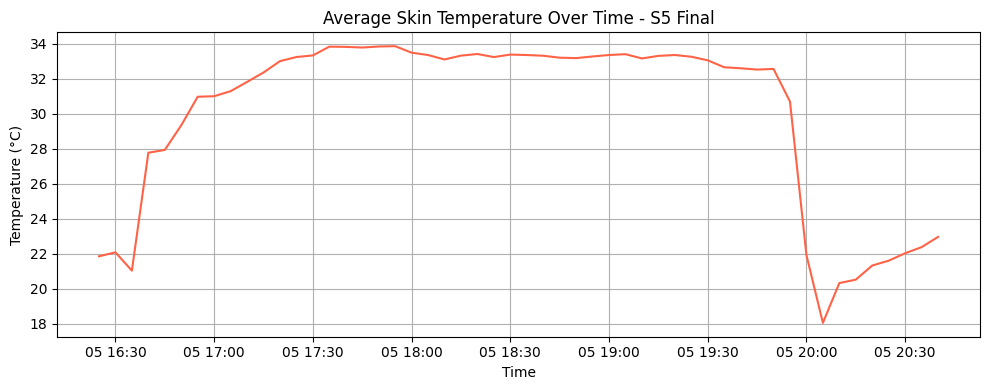

In [11]:
temp_df["timestamp_datetime"] = pd.to_datetime(temp_df["timestamp"], unit="s")

# Set timestamp as index
temp_df.set_index("timestamp_datetime", inplace=True)

# Resample: average temperature every 5 minutes (adjustable)
temp_avg = temp_df.groupby(["Subject", "Exam"]).resample("5min").mean().reset_index()

# Plot example: one subject and exam
example = temp_avg[(temp_avg["Subject"] == "S5") & (temp_avg["Exam"] == "Final")]

plt.figure(figsize=(10, 4))
plt.plot(example["timestamp_datetime"], example["value"], color="tomato")
plt.title("Average Skin Temperature Over Time - S5 Final")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
temp_df

value     timestamp Subject       Exam
timestamp_datetime                                             
2018-12-05 16:28:54.000  21.71  1.544027e+09      S5      Final
2018-12-05 16:28:54.250  21.71  1.544027e+09      S5      Final
2018-12-05 16:28:54.500  21.71  1.544027e+09      S5      Final
2018-12-05 16:28:54.750  21.71  1.544027e+09      S5      Final
2018-12-05 16:28:55.000  21.71  1.544027e+09      S5      Final
...                        ...           ...     ...        ...
2018-11-10 17:44:43.750  22.97  1.541872e+09      S9  Midterm 2
2018-11-10 17:44:44.000  22.97  1.541872e+09      S9  Midterm 2
2018-11-10 17:44:44.250  22.97  1.541872e+09      S9  Midterm 2
2018-11-10 17:44:44.500  22.97  1.541872e+09      S9  Midterm 2
2018-11-10 17:44:44.750  22.97  1.541872e+09      S9  Midterm 2

[1772984 rows x 4 columns]

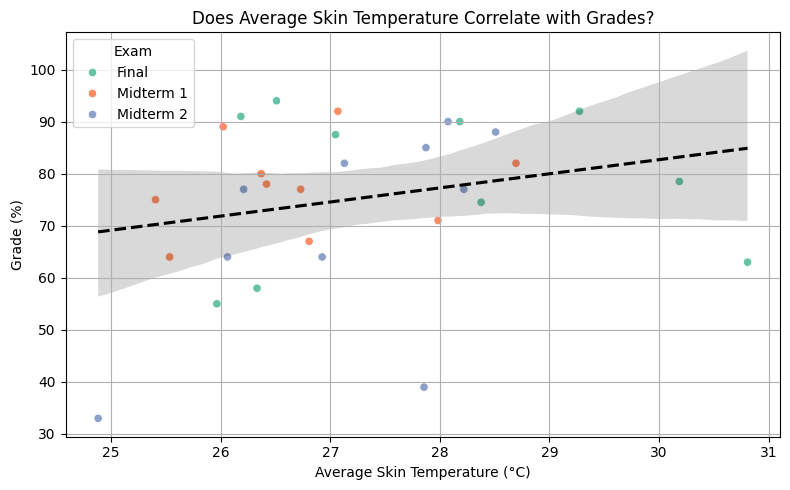

Correlation: 0.24752245144798962


In [13]:
temp_summary = (
    temp_df
    .reset_index()  
    .groupby(["Subject", "Exam"])["value"]
    .mean()
    .reset_index(name="AvgTemp")
)
merged_temp = temp_summary.merge(grades_df, on=["Subject", "Exam"])


plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_temp, x="AvgTemp", y="GradePercent", hue="Exam", palette="Set2")
sns.regplot(data=merged_temp, x="AvgTemp", y="GradePercent", scatter=False, color="black", line_kws={"linestyle":"--"})
plt.title("Does Average Skin Temperature Correlate with Grades?")
plt.xlabel("Average Skin Temperature (°C)")
plt.ylabel("Grade (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Correlation:", merged_temp["AvgTemp"].corr(merged_temp["GradePercent"]))

#### Electrodermal Activity

In [14]:
eda_df

value     timestamp Subject       Exam
0        0.000000  1.544027e+09      S5      Final
1        0.002562  1.544027e+09      S5      Final
2        0.020495  1.544027e+09      S5      Final
3        0.021776  1.544027e+09      S5      Final
4        0.019214  1.544027e+09      S5      Final
...           ...           ...     ...        ...
1773115  0.015375  1.541872e+09      S9  Midterm 2
1773116  0.014094  1.541872e+09      S9  Midterm 2
1773117  0.015375  1.541872e+09      S9  Midterm 2
1773118  0.014094  1.541872e+09      S9  Midterm 2
1773119  0.015375  1.541872e+09      S9  Midterm 2

[1773120 rows x 4 columns]

/var/folders/q3/5_2c3qgd7hs_m8wkyzqfbjgh0000gn/T/ipykernel_45548/2329625435.py:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  .resample("5S")["value"]


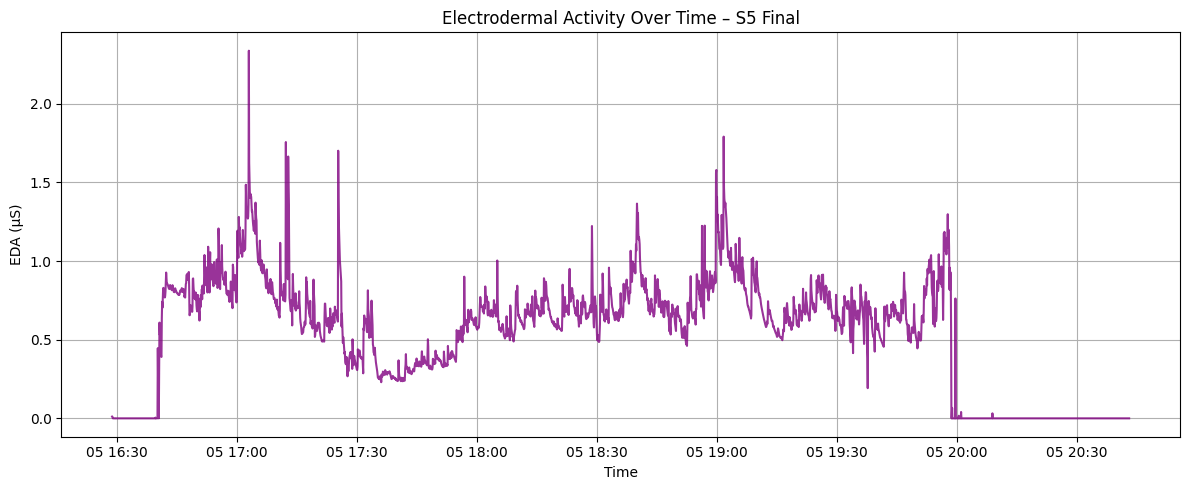

In [15]:

# Pick a student and exam
student = "S5"
exam = "Final"

# Filter the EDA data
eda_single = eda_df[(eda_df["Subject"] == student) & (eda_df["Exam"] == exam)].copy()

# Convert timestamp to datetime if needed
eda_single["timestamp"] = pd.to_datetime(eda_single["timestamp"], unit="s")

# Optional: Downsample for smoother plot (e.g., every 5 seconds)
eda_resampled = (
    eda_single.set_index("timestamp")
    .resample("5S")["value"]
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(eda_resampled["timestamp"], eda_resampled["value"], color="purple", alpha=0.8)
plt.title(f"Electrodermal Activity Over Time – {student} {exam}")
plt.xlabel("Time")
plt.ylabel("EDA (μS)")
plt.grid(True)
plt.tight_layout()
plt.show()

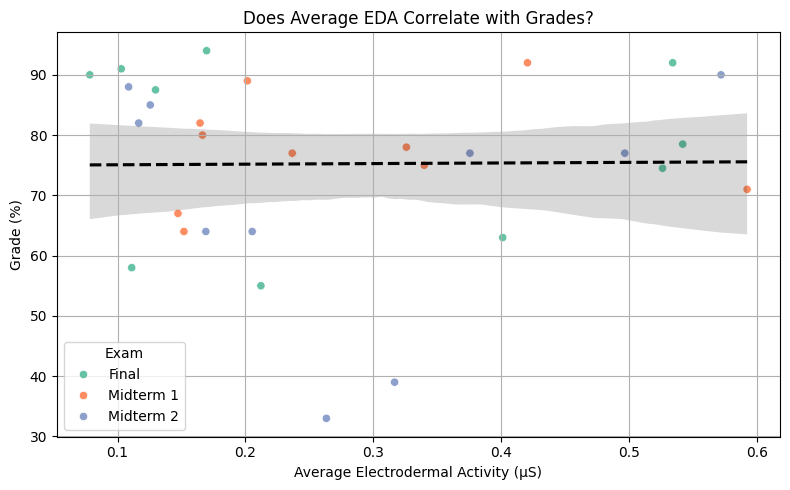

EDA ↔ Grade correlation: 0.011


In [16]:
eda_summary = (
    eda_df.groupby(["Subject", "Exam"])["value"]
    .mean()
    .reset_index(name="AvgEDA")
)

grades_df["Subject"] = grades_df["Subject"].apply(lambda s: f"S{int(s[1:])}")

eda_merged = eda_summary.merge(grades_df, on=["Subject", "Exam"])

plt.figure(figsize=(8, 5))
sns.scatterplot(data=eda_merged, x="AvgEDA", y="GradePercent", hue="Exam", palette="Set2")
sns.regplot(data=eda_merged, x="AvgEDA", y="GradePercent", scatter=False, color="black", line_kws={"linestyle": "--"})
plt.title("Does Average EDA Correlate with Grades?")
plt.xlabel("Average Electrodermal Activity (μS)")
plt.ylabel("Grade (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

corr = eda_merged["AvgEDA"].corr(eda_merged["GradePercent"])
print(f"EDA ↔ Grade correlation: {corr:.3f}")

#### Heart Rate

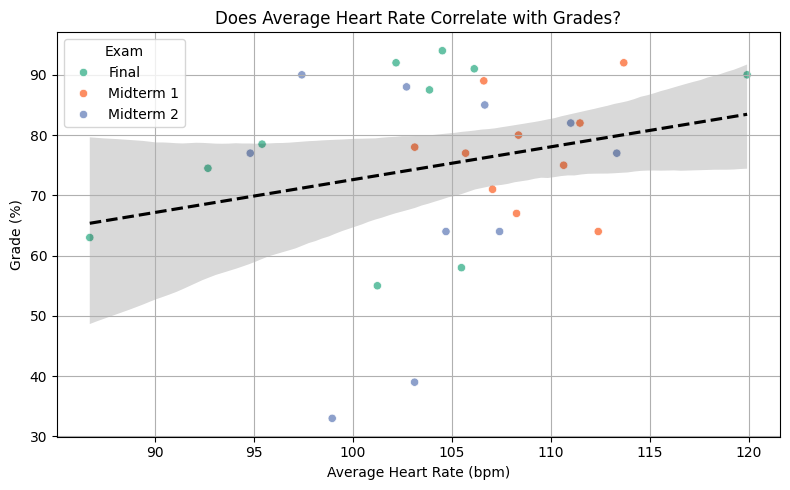

HR ↔ Grade correlation: 0.246


In [17]:
# Group by Subject and Exam to get average HR
hr_summary = (
    hr_df.groupby(["Subject", "Exam"])["value"]
    .mean()
    .reset_index(name="AvgHR")
)
# Ensure Subject format matches (e.g., S01 → S1)
grades_df["Subject"] = grades_df["Subject"].apply(lambda s: f"S{int(s[1:])}")

# Merge grades with avg HR
hr_merged = hr_summary.merge(grades_df, on=["Subject", "Exam"])


plt.figure(figsize=(8, 5))
sns.scatterplot(data=hr_merged, x="AvgHR", y="GradePercent", hue="Exam", palette="Set2")
sns.regplot(data=hr_merged, x="AvgHR", y="GradePercent", scatter=False, color="black", line_kws={"linestyle": "--"})
plt.title("Does Average Heart Rate Correlate with Grades?")
plt.xlabel("Average Heart Rate (bpm)")
plt.ylabel("Grade (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Compute Pearson correlation
corr = hr_merged["AvgHR"].corr(hr_merged["GradePercent"])
print(f"HR ↔ Grade correlation: {corr:.3f}")

/var/folders/q3/5_2c3qgd7hs_m8wkyzqfbjgh0000gn/T/ipykernel_45548/153160033.py:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  .resample("10S")["value"]


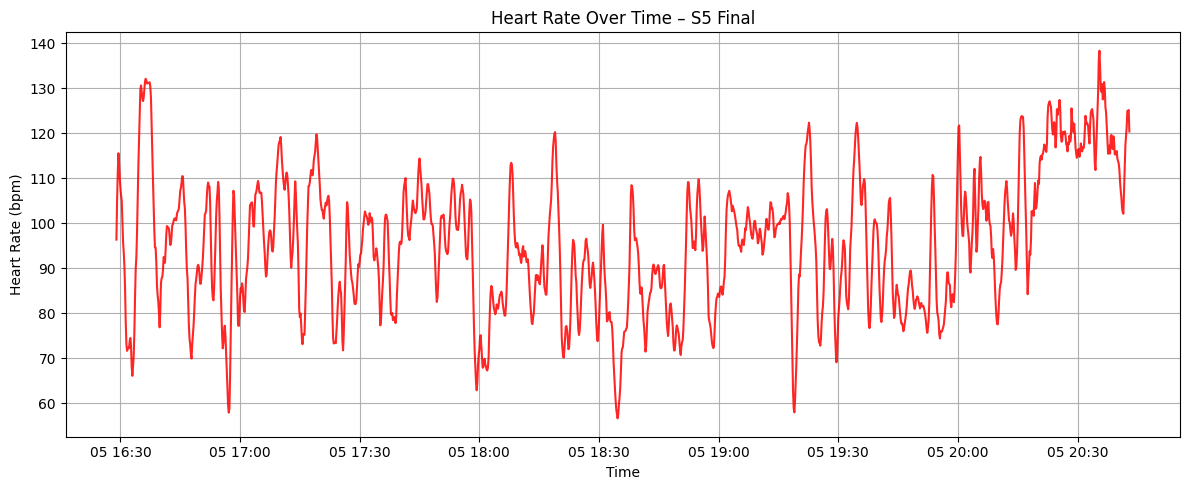

In [18]:

# Pick a student and exam
student = "S5"
exam = "Final"

# Filter the HR data
hr_single = hr_df[(hr_df["Subject"] == student) & (hr_df["Exam"] == exam)].copy()

# Convert UNIX timestamp to datetime
hr_single["timestamp"] = pd.to_datetime(hr_single["timestamp"], unit="s")

# Optional: resample to 10s intervals to smooth noise
hr_resampled = (
    hr_single.set_index("timestamp")
    .resample("10S")["value"]
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(hr_resampled["timestamp"], hr_resampled["value"], color="red", alpha=0.85)
plt.title(f"Heart Rate Over Time – {student} {exam}")
plt.xlabel("Time")
plt.ylabel("Heart Rate (bpm)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
hr = hr_df.copy()
hr['timestamp'] = pd.to_datetime(hr['timestamp'], unit='s')

start_time = hr.groupby('Exam')['timestamp'].min()
hr = hr.merge(start_time, left_on='Exam', right_index=True)

hr['Minutes Elapsed'] = (hr['timestamp_x'] - hr['timestamp_y']).dt.total_seconds() / 60
hr_avg_per_exam = hr.groupby(['Minutes Elapsed', 'Exam'])[['value']].mean().reset_index()
hr_avg_per_exam

Minutes Elapsed       Exam       value
0             0.000000      Final  115.666667
1             0.000000  Midterm 1   50.000000
2             0.000000  Midterm 2   98.000000
3             0.016667      Final   91.666667
4             0.016667  Midterm 1   53.500000
...                ...        ...         ...
52808       430.116667      Final   95.820000
52809       430.133333      Final   94.800000
52810       430.150000      Final   94.830000
52811       430.166667      Final   93.970000
52812       430.183333      Final   93.900000

[52813 rows x 3 columns]

In [66]:
px.line(hr_avg_per_exam, x='Minutes Elapsed', y='value', color='Exam',
        title='Average Heart Rate During Exams')

In [74]:
# Choose subject
subject = 'S1'

hr_by_subject = hr[hr['Subject'] == subject]
hr_by_subject

value         timestamp_x Subject       Exam         timestamp_y  \
265974  116.00 2018-12-05 16:29:07      S1      Final 2018-12-05 16:29:04   
265975   82.50 2018-12-05 16:29:08      S1      Final 2018-12-05 16:29:04   
265976   96.33 2018-12-05 16:29:09      S1      Final 2018-12-05 16:29:04   
265977   86.25 2018-12-05 16:29:10      S1      Final 2018-12-05 16:29:04   
265978   98.60 2018-12-05 16:29:11      S1      Final 2018-12-05 16:29:04   
...        ...                 ...     ...        ...                 ...   
311652  125.58 2018-11-10 17:24:47      S1  Midterm 2 2018-11-10 14:16:34   
311653  126.40 2018-11-10 17:24:48      S1  Midterm 2 2018-11-10 14:16:34   
311654  125.52 2018-11-10 17:24:49      S1  Midterm 2 2018-11-10 14:16:34   
311655  124.90 2018-11-10 17:24:50      S1  Midterm 2 2018-11-10 14:16:34   
311656  123.65 2018-11-10 17:24:51      S1  Midterm 2 2018-11-10 14:16:34   

        Minutes Elapsed  
265974         0.050000  
265975         0.066667  
265976         0.083333  
265977         0.100000  
265978         0.116667  
...                 ...  
311652       188.216667  
311653       188.233333  
311654       188.250000  
311655       188.266667  
311656       188.283333  

[45683 rows x 6 columns]

In [75]:
px.line(hr_by_subject, x='Minutes Elapsed', y='value', color='Exam',
        title=f'Heart Rate of {subject} During Exams')

In [76]:
# Choose exam
exam = 'Midterm 1'

hr_by_exam = hr[hr['Exam'] == exam]
hr_by_exam

value         timestamp_x Subject       Exam         timestamp_y  \
15240    50.00 2018-10-13 12:55:31      S5  Midterm 1 2018-10-13 12:55:31   
15241    53.50 2018-10-13 12:55:32      S5  Midterm 1 2018-10-13 12:55:31   
15242    61.00 2018-10-13 12:55:33      S5  Midterm 1 2018-10-13 12:55:31   
15243    91.25 2018-10-13 12:55:34      S5  Midterm 1 2018-10-13 12:55:31   
15244    89.60 2018-10-13 12:55:35      S5  Midterm 1 2018-10-13 12:55:31   
...        ...                 ...     ...        ...                 ...   
430575  163.98 2018-10-13 16:27:22      S9  Midterm 1 2018-10-13 12:55:31   
430576  162.55 2018-10-13 16:27:23      S9  Midterm 1 2018-10-13 12:55:31   
430577  161.45 2018-10-13 16:27:24      S9  Midterm 1 2018-10-13 12:55:31   
430578  160.33 2018-10-13 16:27:25      S9  Midterm 1 2018-10-13 12:55:31   
430579  159.18 2018-10-13 16:27:26      S9  Midterm 1 2018-10-13 12:55:31   

        Minutes Elapsed  
15240          0.000000  
15241          0.016667  
15242          0.033333  
15243          0.050000  
15244          0.066667  
...                 ...  
430575       211.850000  
430576       211.866667  
430577       211.883333  
430578       211.900000  
430579       211.916667  

[117662 rows x 6 columns]

In [78]:
px.line(hr_by_exam, x='Minutes Elapsed', y='value', color='Subject',
        title=f'Heart Rate During {exam}, by Subject')

In [96]:
# Correlation between heart rate range and grade?

hr_stats = hr_df.groupby(['Subject', 'Exam'])['value'].describe()
hr_stats['range'] = hr_stats['max'] - hr_stats['min']
hr_stats_grades = hr_stats[['range']].reset_index().merge(grades_df, on=['Subject', 'Exam'])

print(f'Correlation: {hr_stats_grades['range'].corr(hr_stats_grades['GradePercent'])}')

Correlation: 0.22405204113262717


In [113]:
# Correlation between heart rate range in the first 30 minutes and grade?

hr_first_10 = hr.copy()
hr_first_10 = hr_first_10[hr_first_10['Minutes Elapsed'] <= 30]

hr_first_10_stats = hr_first_10.groupby(['Subject', 'Exam'])['value'].describe()
hr_first_10_stats['range'] = hr_first_10_stats['max'] - hr_first_10_stats['min']
hr_first_10_stats_grades = hr_first_10_stats[['range']].reset_index().merge(grades_df, on=['Subject', 'Exam'])

print(f'Correlation: {hr_first_10_stats_grades['range'].corr(hr_first_10_stats_grades['GradePercent'])}')

Correlation: 0.055322445451321645


In [109]:
# Correlation between heart rate range in the last 30 minutes and grade?

last_10 = hr.groupby('Exam')['Minutes Elapsed'].max()
hr_last_10 = hr.copy()
hr_last_10 = hr_last_10.merge(last_10, left_on='Exam', right_index=True)
hr_last_10 = hr_last_10[hr_last_10['Minutes Elapsed_y'] - hr_last_10['Minutes Elapsed_x'] <= 30]

hr_last_10_stats = hr_last_10.groupby(['Subject', 'Exam'])['value'].describe()
hr_last_10_stats['range'] = hr_last_10_stats['max'] - hr_last_10_stats['min']
hr_last_10_stats_grades = hr_last_10_stats[['range']].reset_index().merge(grades_df, on=['Subject', 'Exam'])

print(f'Correlation: {hr_last_10_stats_grades['range'].corr(hr_last_10_stats_grades['GradePercent'])}')

Correlation: 0.3190655900685669


In [119]:
# Correlation between max heart rate and grade?

hr_max = hr.groupby(['Subject', 'Exam'])[['value']].max().reset_index()
hr_max_grades = hr_max.merge(grades_df, on=['Subject', 'Exam'])

print(f'Correlation: {hr_max_grades['value'].corr(hr_max_grades['GradePercent'])}')

Correlation: 0.2674948732498238


In [120]:
# Correlation between min heart rate and grade?

hr_min = hr.groupby(['Subject', 'Exam'])[['value']].min().reset_index()
hr_min_grades = hr_min.merge(grades_df, on=['Subject', 'Exam'])

print(f'Correlation: {hr_min_grades['value'].corr(hr_min_grades['GradePercent'])}')

Correlation: 0.1115759470253464


#### Inter-Beat Interval

It refers to the time in seconds between consecutive heartbeats, measured from the peaks of successive heartbeats (often from the R-peaks in an ECG or from peaks in the BVP signal in wearables).

Shorter IBI → higher heart rate,
Longer IBI → lower heart rate.

BI is key for calculating Heart Rate Variability (HRV) — a measure of how much the time between heartbeats varies.

In [20]:
ibi_df

offset  ibi_duration     timestamp Subject       Exam
0       240.823524      1.734454  1.544028e+09      S5      Final
1       242.589229      1.765706  1.544028e+09      S5      Final
2       270.778019      0.937543  1.544028e+09      S5      Final
3       335.218469      0.515649  1.544028e+09      S5      Final
4       340.499961      0.453146  1.544028e+09      S5      Final
...            ...           ...           ...     ...        ...
43899  7889.111120      0.750034  1.541867e+09      S9  Midterm 2
43900  7963.208262      0.609403  1.541867e+09      S9  Midterm 2
43901  8096.448735      0.765660  1.541868e+09      S9  Midterm 2
43902  8097.448781      1.000046  1.541868e+09      S9  Midterm 2
43903  8098.355073      0.906291  1.541868e+09      S9  Midterm 2

[43904 rows x 5 columns]

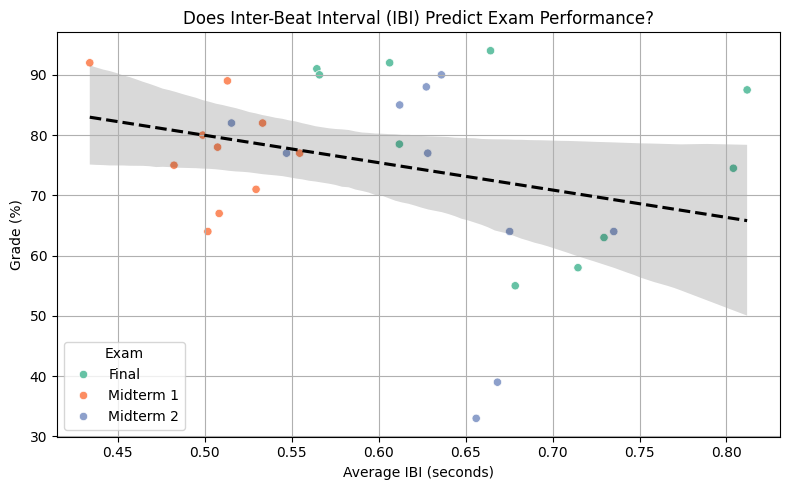

IBI ↔ Grade correlation: -0.288


In [21]:
# Calculate average IBI for each Subject and Exam
ibi_summary = (
    ibi_df.groupby(["Subject", "Exam"])["ibi_duration"]
    .mean()
    .reset_index(name="AvgIBI")
)

# Ensure Subject format matches (e.g., S01 → S1)
grades_df["Subject"] = grades_df["Subject"].apply(lambda s: f"S{int(s[1:])}")

# Merge
ibi_merged = ibi_summary.merge(grades_df, on=["Subject", "Exam"])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=ibi_merged, x="AvgIBI", y="GradePercent", hue="Exam", palette="Set2")
sns.regplot(data=ibi_merged, x="AvgIBI", y="GradePercent", scatter=False, color="black", line_kws={"linestyle": "--"})
plt.title("Does Inter-Beat Interval (IBI) Predict Exam Performance?")
plt.xlabel("Average IBI (seconds)")
plt.ylabel("Grade (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Pearson correlation
corr = ibi_merged["AvgIBI"].corr(ibi_merged["GradePercent"])
print(f"IBI ↔ Grade correlation: {corr:.3f}")

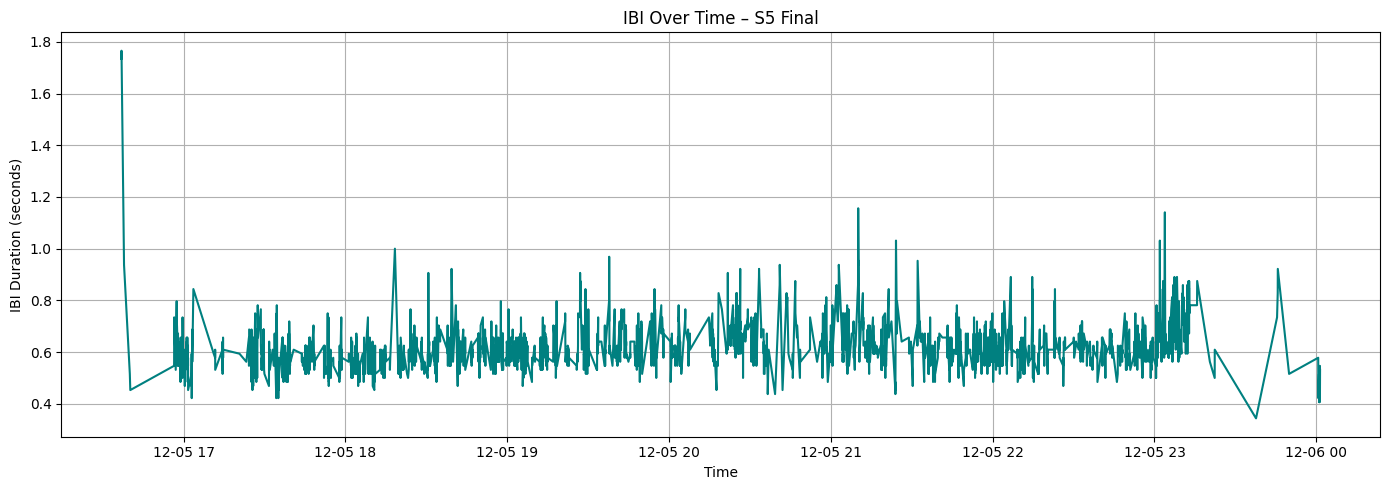

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for one student and exam
ibi_filtered = ibi_df[(ibi_df['Subject'] == 'S5') & (ibi_df['Exam'] == 'Final')].copy()

# Create a datetime column by adding offset (in seconds) to the exam start time
ibi_filtered["timestamp_datetime"] = pd.to_datetime(ibi_filtered["timestamp"] + ibi_filtered["offset"], unit="s")

# Plot
plt.figure(figsize=(14, 5))
plt.plot(ibi_filtered["timestamp_datetime"], ibi_filtered["ibi_duration"], color='teal')
plt.title("IBI Over Time – S5 Final")
plt.xlabel("Time")
plt.ylabel("IBI Duration (seconds)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Accelerometer

ACC_X, ACC_Y, ACC_Z: Measure acceleration in the X, Y, and Z directions.
	•	Values are in units of 1/64 g, where g ≈ 9.81 m/s² (Earth’s gravity).
	•	The Empatica E4 device records these at a high frequency (32 Hz).

In [23]:
acc_df["timestamp_datetime"] = pd.to_datetime(acc_df["timestamp"], unit="s")
acc_df

ACC_X  ACC_Y  ACC_Z     timestamp Subject       Exam   magnitude  \
0            -2    -63      6  1.544027e+09      S5      Final   63.316664   
1            -2    -62      6  1.544027e+09      S5      Final   62.321746   
2            -2    -63      7  1.544027e+09      S5      Final   63.419240   
3            -2    -62      6  1.544027e+09      S5      Final   62.321746   
4            -2    -62      6  1.544027e+09      S5      Final   62.321746   
...         ...    ...    ...           ...     ...        ...         ...   
14185273     16    -20     60  1.541872e+09      S9  Midterm 2   65.238026   
14185274     16    -20     60  1.541872e+09      S9  Midterm 2   65.238026   
14185275     17    -17     59  1.541872e+09      S9  Midterm 2   63.710282   
14185276     21     -3     59  1.541872e+09      S9  Midterm 2   62.697687   
14185277     10    -78     72  1.541872e+09      S9  Midterm 2  106.620823   

                 timestamp_datetime  
0        2018-12-05 16:28:54.000000  
1        2018-12-05 16:28:54.031250  
2        2018-12-05 16:28:54.062500  
3        2018-12-05 16:28:54.093750  
4        2018-12-05 16:28:54.125000  
...                             ...  
14185273 2018-11-10 17:44:46.468750  
14185274 2018-11-10 17:44:46.500000  
14185275 2018-11-10 17:44:46.531250  
14185276 2018-11-10 17:44:46.562500  
14185277 2018-11-10 17:44:46.593750  

[14185278 rows x 8 columns]

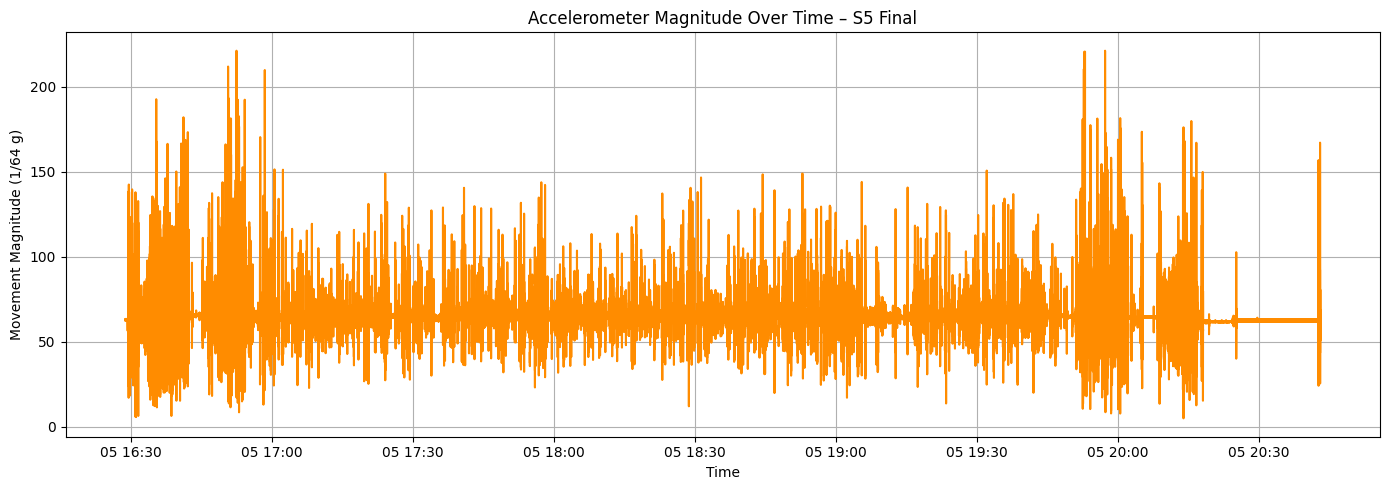

In [24]:
# Filter for one session
single = acc_df[(acc_df["Subject"] == "S5") & (acc_df["Exam"] == "Final")]

# Plot
plt.figure(figsize=(14,5))
plt.plot(single["timestamp_datetime"], single["magnitude"], color='darkorange')
plt.title("Accelerometer Magnitude Over Time – S5 Final")
plt.xlabel("Time")
plt.ylabel("Movement Magnitude (1/64 g)")
plt.grid(True)
plt.tight_layout()
plt.show()

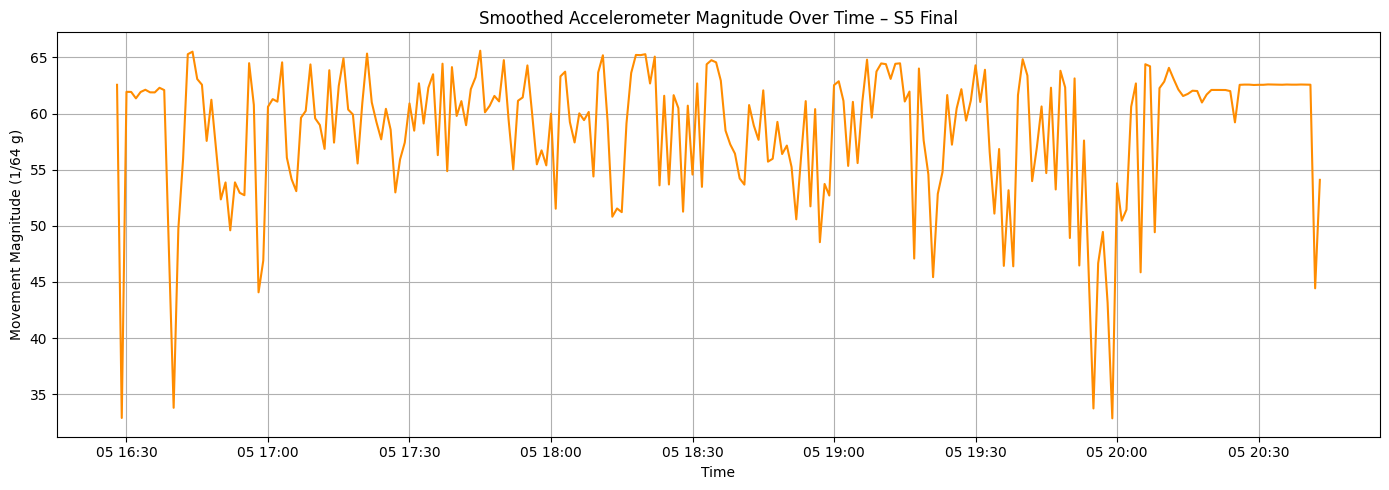

In [25]:
# Convert timestamp and set index
acc_df["timestamp_datetime"] = pd.to_datetime(acc_df["timestamp"], unit="s")
acc_df.set_index("timestamp_datetime", inplace=True)

# Filter for just S5 Final
acc_s5_final = acc_df[(acc_df["Subject"] == "S5") & (acc_df["Exam"] == "Final")]

# Keep only numeric columns for resampling
acc_s5_final_numeric = acc_s5_final[["ACC_X", "ACC_Y", "ACC_Z"]]

# Resample and take the mean every 1 minute
acc_resampled = acc_s5_final_numeric.resample("1min").mean()

# Compute magnitude of movement
acc_resampled["magnitude"] = np.sqrt(
    acc_resampled["ACC_X"]**2 + acc_resampled["ACC_Y"]**2 + acc_resampled["ACC_Z"]**2
)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(acc_resampled.index, acc_resampled["magnitude"], color='darkorange')
plt.title("Smoothed Accelerometer Magnitude Over Time – S5 Final")
plt.xlabel("Time")
plt.ylabel("Movement Magnitude (1/64 g)")
plt.grid(True)
plt.tight_layout()
plt.show()

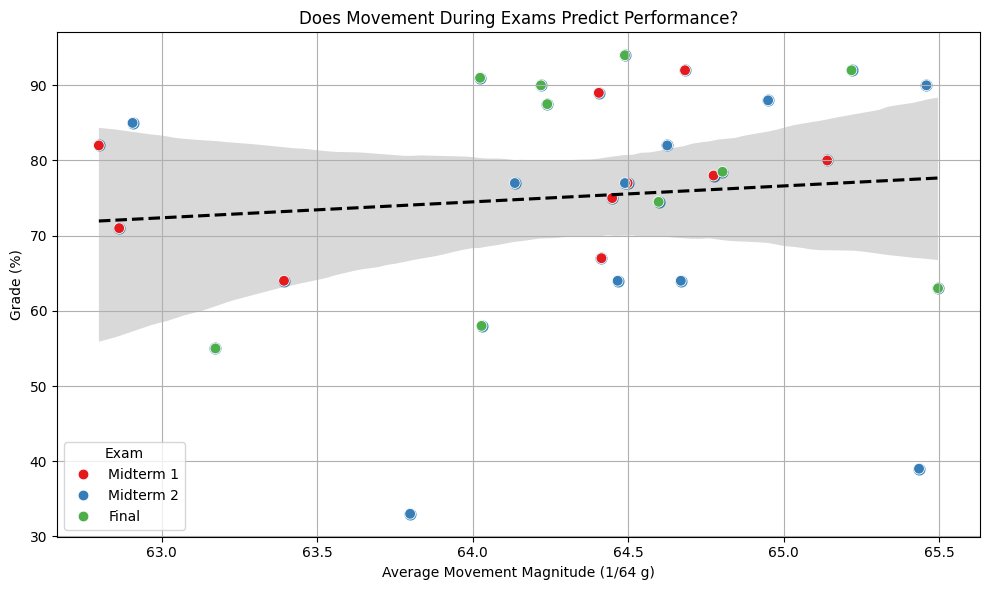

In [26]:
# 2. Average per subject/exam
movement_summary = acc_df.groupby(["Subject", "Exam"])["magnitude"].mean().reset_index()
movement_summary.rename(columns={"magnitude": "AvgMovement"}, inplace=True)

# 3. Merge with grades
movement_grades = pd.merge(grades_df, movement_summary, on=["Subject", "Exam"])

# 4. Plot
plt.figure(figsize=(10, 6))
sns.regplot(data=movement_grades, x="AvgMovement", y="GradePercent", scatter_kws={"s": 60}, line_kws={"color": "black", "linestyle": "--"})
sns.scatterplot(data=movement_grades, x="AvgMovement", y="GradePercent", hue="Exam", palette="Set1", s=60, legend=True)

plt.title("Does Movement During Exams Predict Performance?")
plt.xlabel("Average Movement Magnitude (1/64 g)")
plt.ylabel("Grade (%)")
plt.grid(True)
plt.tight_layout()
plt.show()